
## Part 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
grid = []
with open('input.txt') as lines:
    for line in lines:
        row = []
        for c in line:
            if c != '\n':
                row.append(c)
        grid.append(row)
        
grid = np.asarray(grid)

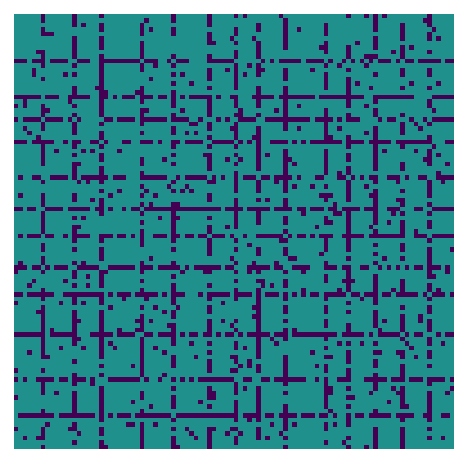

In [3]:
def display(thisgrid):
    clear_output(wait=True)
    img = thisgrid.copy()
    img[img == '.'] = 0
    img[img == 'L'] = 1.5
    img[img == '#'] = 2
    img = img.astype(int)
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, vmin=0, vmax=2)
    plt.show()
    
def print_grid(grid):
    for y in grid:
        for x in y:
            print(x, end='')
        print()
    
display(grid)

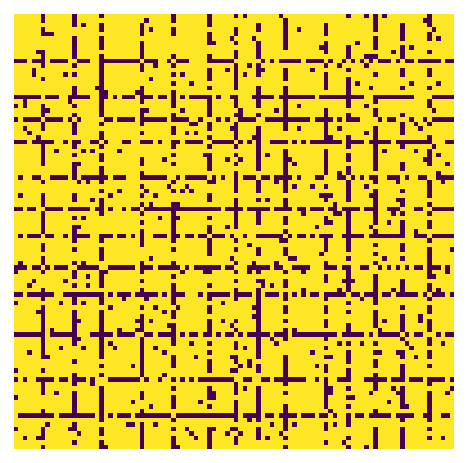

In [4]:
def neighbours(grid, x_i, y_i):
    neighbours = {'.': 0, 'L': 0, '#': 0}
    directions = [[-1, -1], [-1, 0], [-1, 1],
                  [ 0, -1],          [ 0, 1],
                  [ 1, -1], [ 1, 0], [ 1, 1]]
    
    for x, y in directions:
        dx = x_i + x
        dy = y_i + y
        if dy < len(grid) and dy >= 0 and dx < len(grid[dy]) and dx >= 0:
            neighbours[grid[dy, dx]] += 1
            
    if grid[y_i][x_i] == 'L':
        return neighbours['#'] == 0
    elif grid[y_i][x_i] == '#':
        return neighbours['#'] >= 4
    else:
        return False

print(neighbours(grid, 0, 0))

def next_state(this_grid, consider):
    next_grid = this_grid.copy()
    change = False
    
    for y_i, y in enumerate(this_grid):
        for x_i, x in enumerate(y):
            if x == '.':
                continue
            if x == 'L':
                if consider(this_grid, x_i, y_i):
                    change = True
                    next_grid[y_i][x_i] = '#'
            if x == '#':
                if consider(this_grid, x_i, y_i):
                    change = True
                    next_grid[y_i][x_i] = 'L'
    
    return next_grid, change

display(grid)
next_grid, change = next_state(grid, neighbours)
display(next_grid)

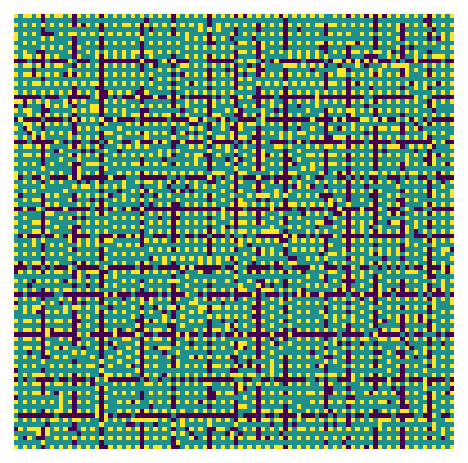

2489


In [5]:
change = True
count = 0
next_grid = grid.copy()
display(next_grid)

while (change == True and count < 100):
    count += 1
    next_grid, change = next_state(next_grid, neighbours)
    display(next_grid)
    
print(np.count_nonzero(next_grid[next_grid == '#']))

## Part 2

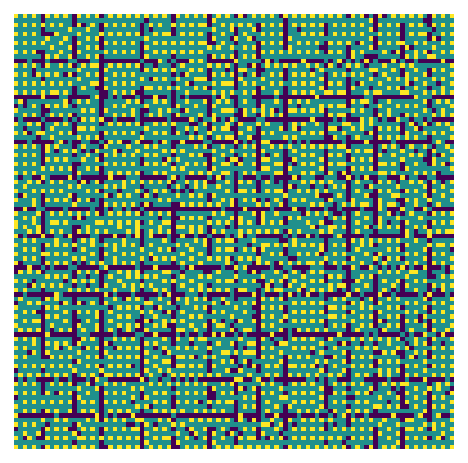

2180


In [6]:
def sight_lines(grid, x_i, y_i):
    neighbours = {'.': 0, 'L': 0, '#': 0}
    directions = [[-1, -1], [-1, 0], [-1, 1],
                  [ 0, -1],          [ 0, 1],
                  [ 1, -1], [ 1, 0], [ 1, 1]]
    
    for x, y in directions:
        dx = x_i + x
        dy = y_i + y
        while dy < len(grid) and dy >= 0 and dx < len(grid[dy]) and dx >= 0:
            neighbours[grid[dy, dx]] += 1
            if grid[dy, dx] != '.':
                break
            dx += x
            dy += y
            
    if grid[y_i][x_i] == 'L':
        return neighbours['#'] == 0
    elif grid[y_i][x_i] == '#':
        return neighbours['#'] >= 5
    else:
        return False
    
change = True
count = 0
next_grid = grid.copy()
display(next_grid)

while (change == True and count < 100):
    count += 1
    next_grid, change = next_state(next_grid, sight_lines)
    display(next_grid)
    
print(np.count_nonzero(next_grid[next_grid == '#']))